In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from PIL import Image
import albumentations as A

/home/psyqc1/miniforge3/envs/leaf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_2787882/4180599870.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n_classes)


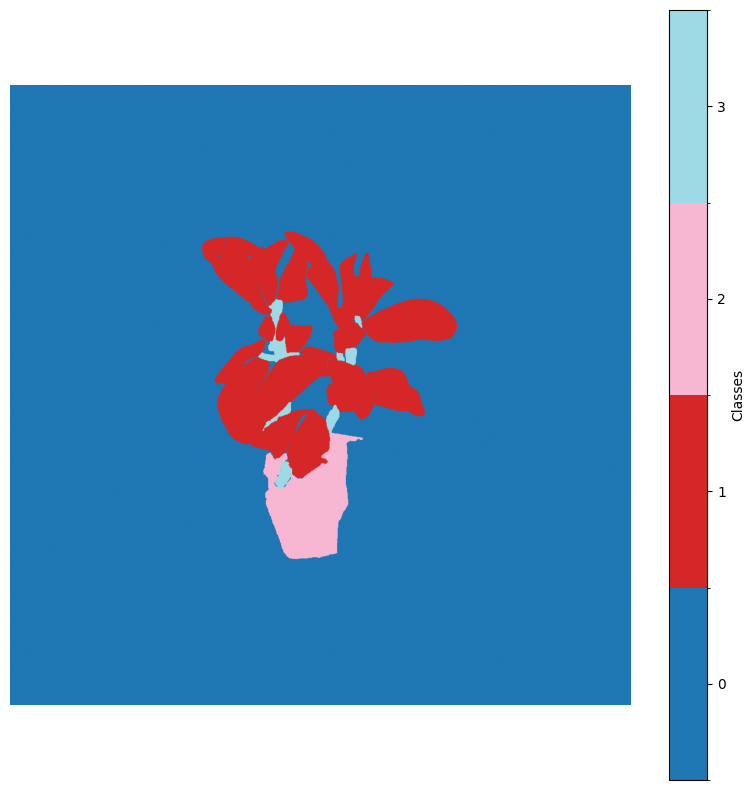

In [5]:
def show_mask_visual(mask):
    plt.figure(figsize=(10, 10))
    decoded = Image.open(mask).convert("L")
    n_classes = len(np.unique(np.array(decoded)))
    cmap = plt.cm.get_cmap('tab20', n_classes)
    norm = colors.BoundaryNorm(boundaries=np.arange(-0.5, n_classes + 0.5, 1), ncolors=n_classes)
    im = plt.imshow(decoded, cmap=cmap, norm=norm)
    plt.axis('off')

    cbar = plt.colorbar(im, ticks=range(n_classes))
    cbar.set_label('Classes')

show_mask_visual("../data/bean_semantic_real_train/mask/0060_train.png")

In [ ]:
# resolution shape - always 2d (hopefully)
m = np.array(Image.open("63.png"))
print(m.shape)
print(len(m.shape))

(512, 512)
2


Classes found in mask: [0 1 2 3]


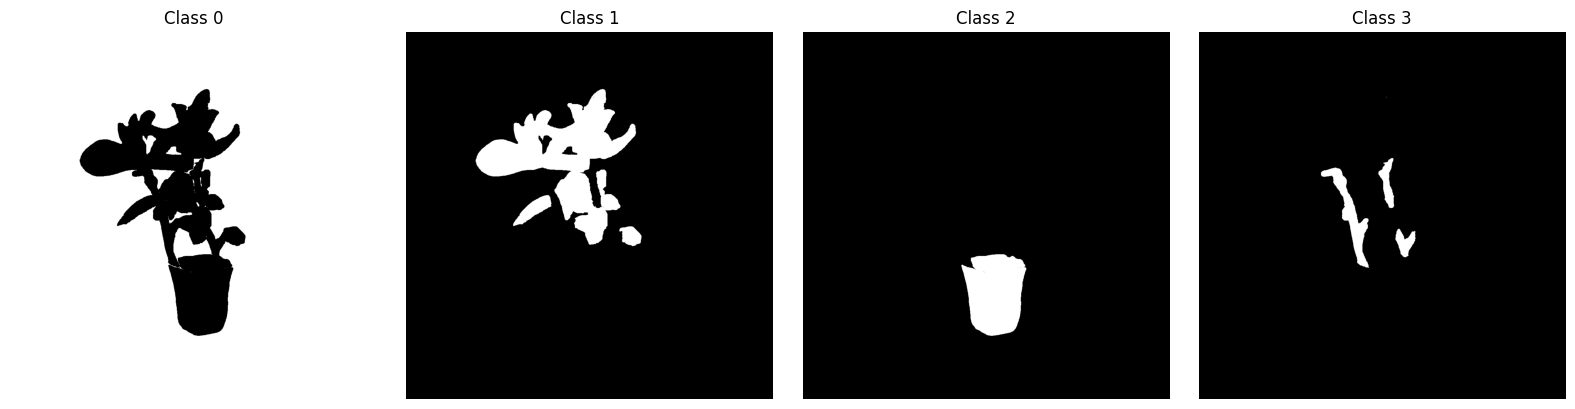

Classes found in mask: [0 1 2 3]


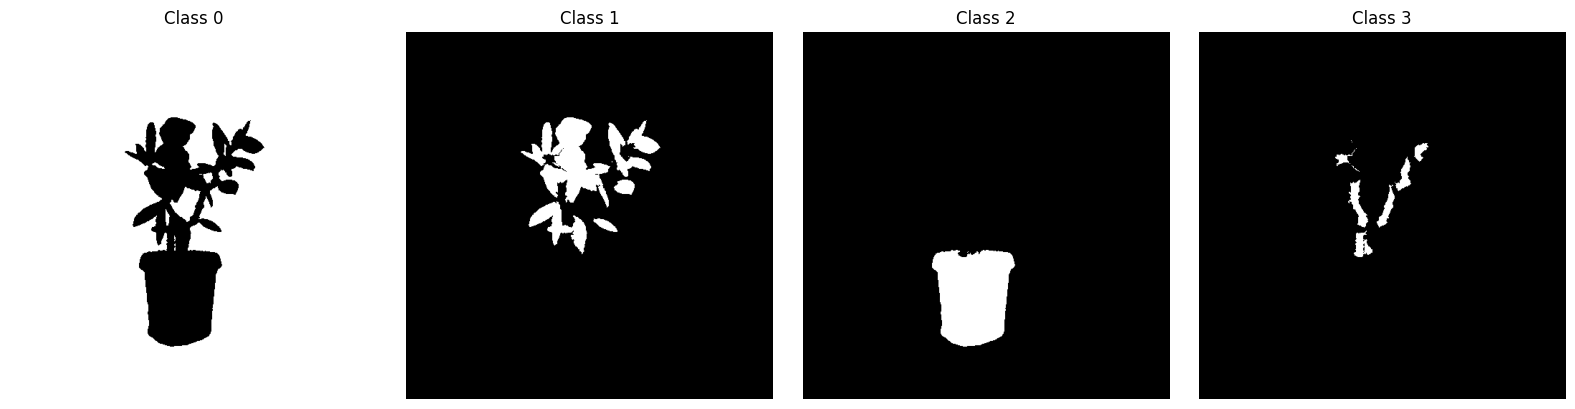

Classes found in mask: [0 1 2 3]


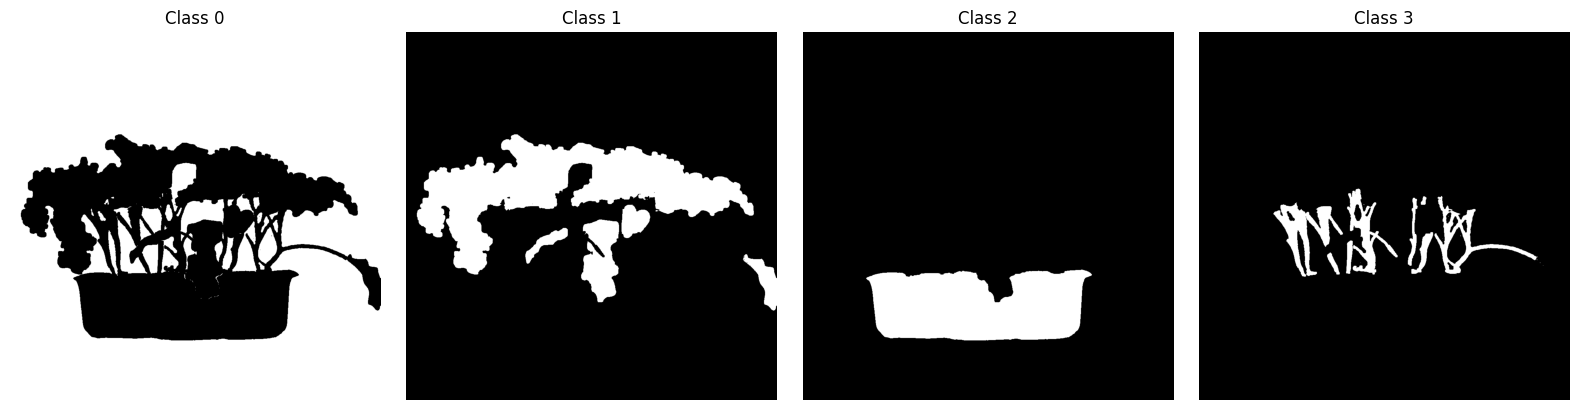

Classes found in mask: [0 1 2 3]


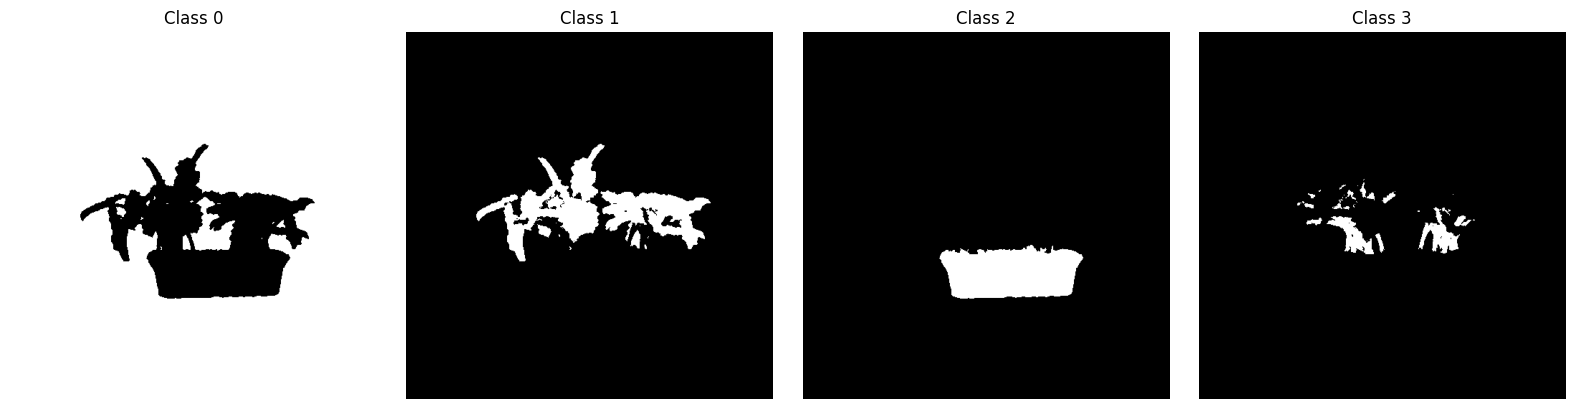

Classes found in mask: [0 1 2 3]


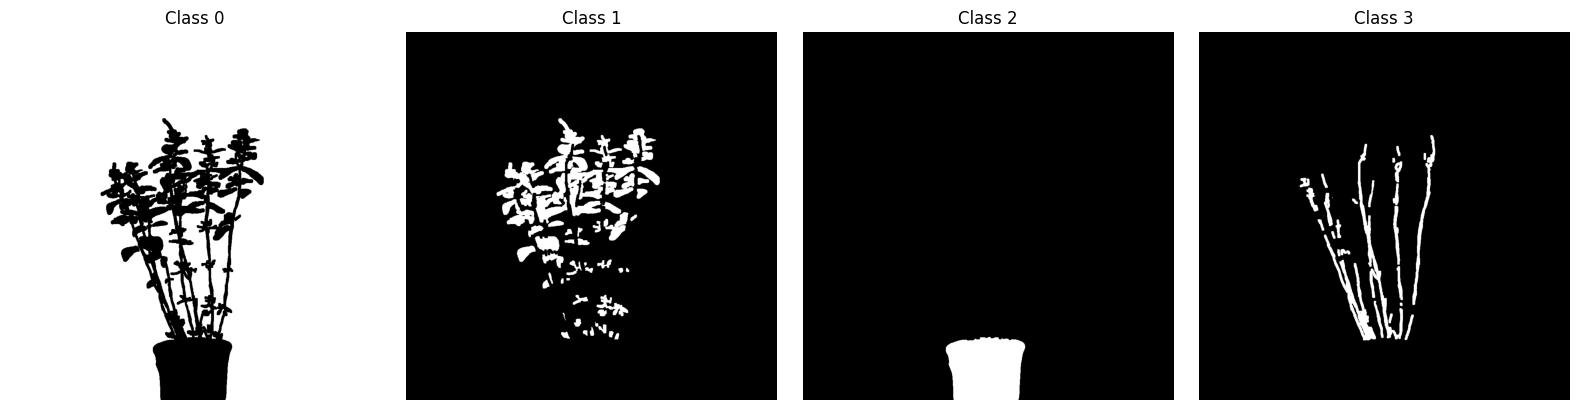

Classes found in mask: [0 1 2 3]


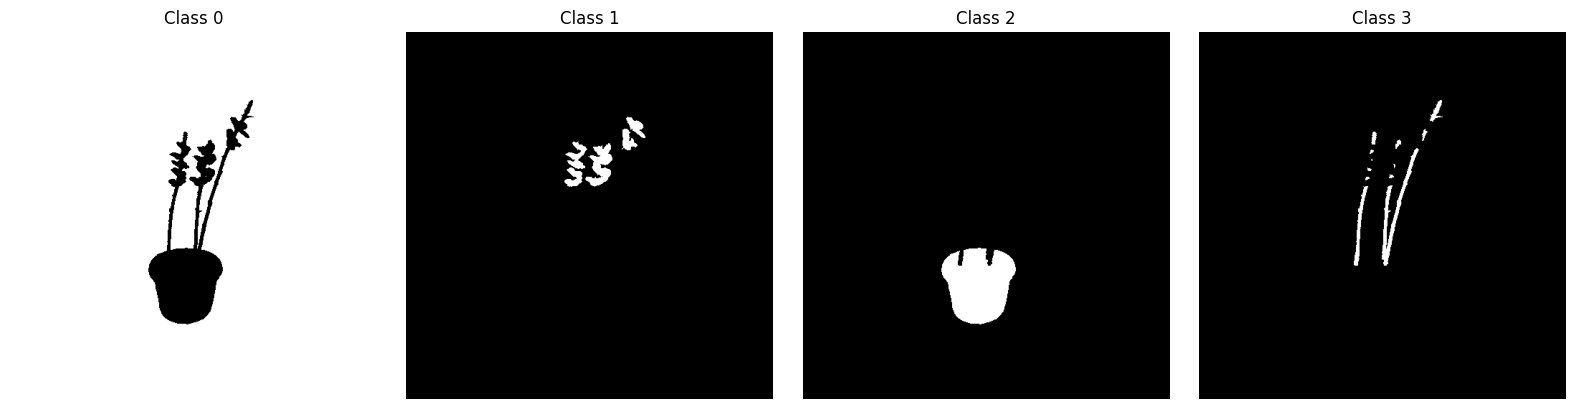

In [ ]:


def visualize_mask_classes(mask_path):
    mask = np.array(Image.open(mask_path).convert("L"))
    if mask is None:
        raise ValueError("Mask could not be loaded. Check the file path.")

    classes = np.unique(mask)
    print("Classes found in mask:", classes)
    num_classes = len(classes)
    cols = 4
    rows = int(np.ceil(num_classes / cols))

    plt.figure(figsize=(4 * cols, 4 * rows))

    for i, cls in enumerate(classes):
        binary = (mask == cls).astype(np.uint8) * 255

        plt.subplot(rows, cols, i + 1)
        plt.imshow(binary, cmap="gray")
        plt.title(f"Class {cls}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Example usage
visualize_mask_classes("bean/real.png")
visualize_mask_classes("bean/synth.png")
visualize_mask_classes("kale/real.png")
visualize_mask_classes("kale/synth.png")
visualize_mask_classes("mint/real.png")
visualize_mask_classes("mint/synth.png")

In [5]:
import cv2
import numpy as np
from pathlib import Path

def fix_mask_classes(input_path, output_path, wrong_id=4, correct_id=3):
    mask = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError("Could not load mask. Check the path.")

    print("Classes before:", np.unique(mask))
    mask_fixed = np.where(mask == wrong_id, correct_id, mask).astype(np.uint8)
    cv2.imwrite(output_path, mask_fixed)
    print("Classes after:", np.unique(mask_fixed))

    print(f"Fixed mask saved to {output_path}")

dataset = Path("/home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask")
masks = dataset.glob("*.png")

for mask in masks:
    fix_mask_classes(mask, mask)



Classes before: [0 1]
Classes after: [0 1]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0198_train.png
Classes before: [0 1 4]
Classes after: [0 1 3]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0063_train.png
Classes before: [0 1 2 4]
Classes after: [0 1 2 3]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0103_train.png
Classes before: [0 1 2 4]
Classes after: [0 1 2 3]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0144_eval.png
Classes before: [0 1 2 4]
Classes after: [0 1 2 3]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0102_train.png
Classes before: [0 1 2 4]
Classes after: [0 1 2 3]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0192_eval.png
Classes before: [0 1 2 4]
Classes after: [0 1 2 3]
Fixed mask saved to /home/psyqc1/leaf-segmentation/data/bean_real_semantic/mask/0101_tr